In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("C:/Users/610063/Downloads/Hex Software Internship/Task 1 Week (30th Dec - 05 Jan 2025)/Titanic Dataset/Titanic Dataset.csv")

In [3]:
dataset.head() # checking or understanding variables in the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataset.tail() # checking last 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
dataset.shape # dimensions of the data

(418, 12)

In [6]:
dataset.describe() # getting the summary statistics from the numerical variables in the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
dataset.nunique() #checking unique values in our data

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [9]:
dataset['Pclass'].unique()
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
#Cleaning the data

In [11]:
 dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True) # removing null values for the age variable bu filling them with an average

In [13]:
new_data = dataset.drop(['Cabin','Embarked' ,'PassengerId','SibSp', 'Parch'  ],axis=1) # removing unnecessary columns

In [14]:
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

In [15]:
new_data.isnull().sum() # All null values has  been removed the data is clean

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Ticket      0
Fare        1
dtype: int64

<Axes: >

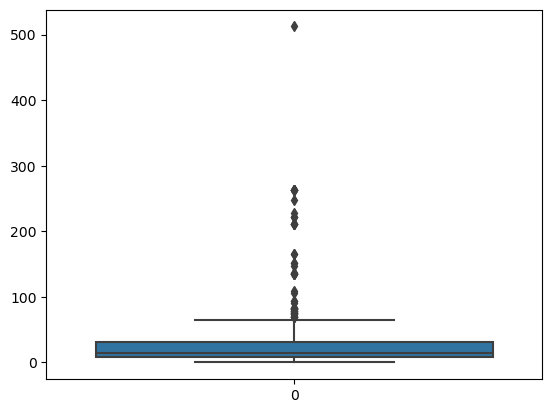

In [16]:
#Checking for outliers in the Fare variable using the boxplot 
sns.boxplot(new_data['Fare'])


<Axes: >

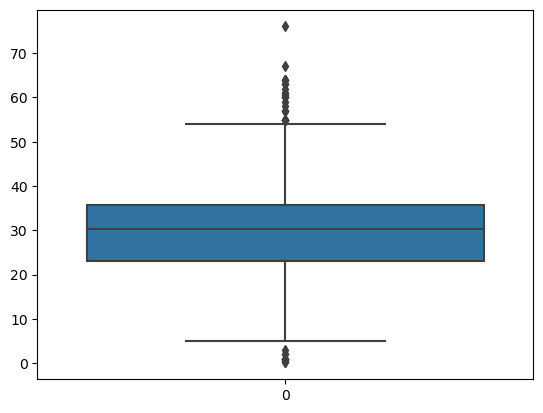

In [17]:
#Checking for outliers in the Age variable using the boxplot 
sns.boxplot(new_data['Age'])

In [18]:
#Handling Outliers for Age and Fair columns using IQR Method
q1_Age = new_data['Age'].quantile(0.25)
q3_Age = new_data['Age'].quantile(0.75)
def IQR_Age():
    Q1 = new_data['Age'].quantile(0.25)
    Q3 = new_data['Age'].quantile(0.75)
    IQR = Q3 -Q1
    return IQR

q1_Fare = new_data['Fare'].quantile(0.25)
q3_Fare = new_data['Fare'].quantile(0.75)
def IQR_Fare():
    Q1 = new_data['Fare'].quantile(0.25)
    Q3 = new_data['Fare'].quantile(0.75)
    IQR = Q3 -Q1
    return IQR
IQR_Age(),IQR_Fare()

(12.75, 23.6042)

In [19]:
# Calculating the Upper and lower limit using IQR to discard outliers in an Age and Fare Variable
Upper_limit_Age = q3_Age + (1.5* IQR_Age())
Lower_limit_Age = q1_Age - (1.5* IQR_Age())
Lower_limit_Age,Upper_limit_Age

Upper_limit_Fare = q3_Fare + (1.5* IQR_Age())
Lower_limit_Fare = q1_Fare - (1.5* IQR_Age())
Lower_limit_Age,Upper_limit_Age

(3.875, 54.875)

In [20]:
# Finding the outliers in our dataset for Age and Fare variables 
new_data.loc[(new_data['Age'] > Upper_limit_Age) | (new_data['Age'] < Lower_limit_Age)]




,Survived,Pclass,Name,Sex,Age,Ticket,Fare
2,0,2,"Myles, Mr. Thomas Francis",male,62.00,240276,9.6875
13,0,2,"Howard, Mr. Benjamin",male,63.00,24065,26.0000
20,0,1,"Rothschild, Mr. Martin",male,55.00,PC 17603,59.4000
48,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.00,11813,76.2917
69,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.00,19950,263.0000
77,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.00,11770,25.7000
81,0,1,"Straus, Mr. Isidor",male,67.00,PC 17483,221.7792
89,0,2,"Wells, Master. Ralph Lester",male,2.00,29103,23.0000
96,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.00,19877,78.8500
114,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.00,PC 17483,221.7792


In [21]:
new_data.loc[(new_data['Fare'] > Upper_limit_Fare) | (new_data['Fare'] < Lower_limit_Fare)]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare
12,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,21228,82.2667
14,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,W.E.P. 5734,61.1750
20,0,1,"Rothschild, Mr. Martin",male,55.0,PC 17603,59.4000
23,0,1,"Williams, Mr. Richard Norris II",male,21.0,PC 17597,61.3792
24,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,PC 17608,262.3750
...,...,...,...,...,...,...,...
400,1,1,"Bonnell, Miss. Caroline",female,30.0,36928,164.8667
402,1,1,"Gibson, Miss. Dorothy Winifred",female,22.0,112378,59.4000
407,0,1,"Widener, Mr. George Dunton",male,50.0,113503,211.5000
411,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,19928,90.0000


In [22]:
# Remove outliers in the dataset by trimming the data leaving out outliers in the Aage and Fare variables
new_df  = new_data.loc[(new_data['Age'] < Upper_limit_Age) & (new_data['Age'] > Lower_limit_Age)]
print("Old data length",len(new_data))
print("New data length",len(new_df))

Old data length 418
New data length 382


In [29]:
final_Data  = new_df .loc[(new_data['Fare'] < Upper_limit_Fare) & (new_data['Fare'] > Lower_limit_Fare)]
print("Old data length",len(new_df ))
print("New data length",len(final_Data))

Old data length 382
New data length 318


<Axes: >

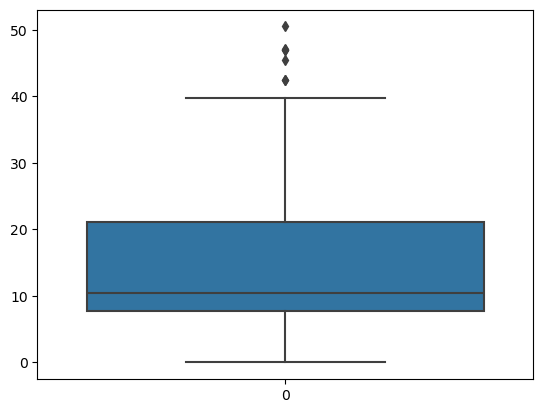

In [30]:
sns.boxplot(final_Data['Fare'])

In [25]:
# Exploration of the relationships between the the variables


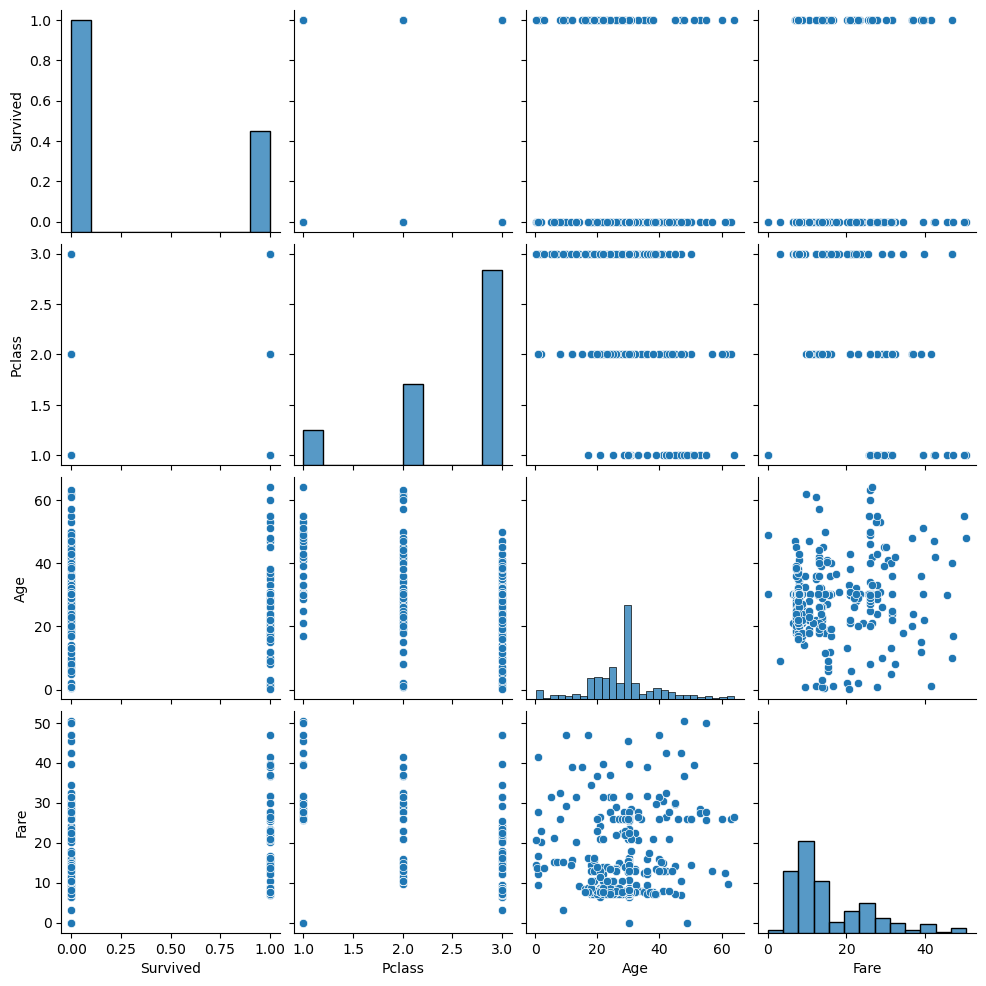

In [26]:
sns.pairplot(final_Data)

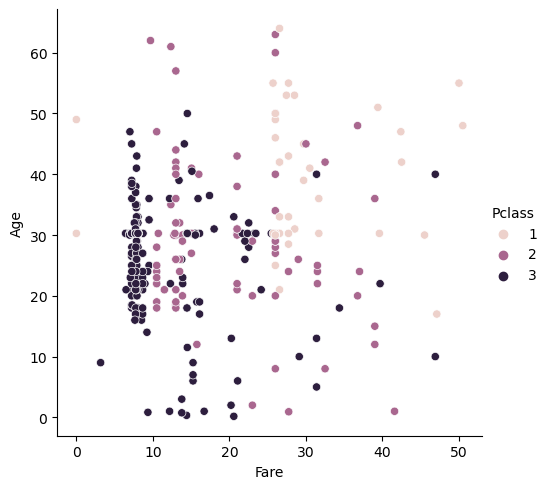

In [27]:
sns.relplot(x='Fare',y='Age',hue='Pclass',data=final_Data)

<Axes: xlabel='Age', ylabel='Density'>

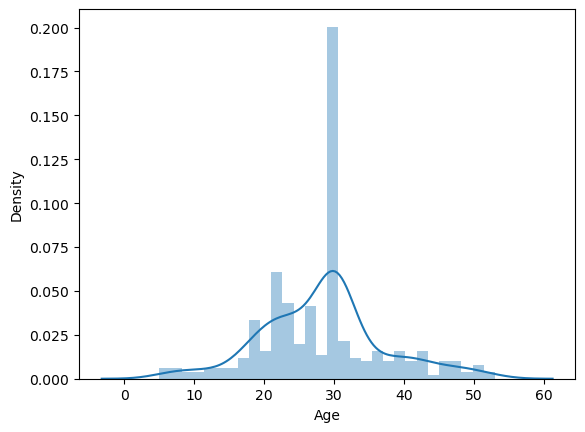

In [31]:
sns.distplot(final_Data['Age'] , bins=30)